In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
import os
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# folder_path="/content/drive/MyDrive/current/ML-project/dataTop/5_image/"
folder_path="/content/drive/MyDrive/ML-project/dataTop5_image/"
na_class=os.listdir(folder_path)
print(na_class)

['comrav', 'houspa', 'houwre', 'redcro', 'sonspa']


In [ ]:
X=[]
Y=[]
image_size=226
i=0
for cl in na_class:
  clpath=folder_path+cl
  names=os.listdir(clpath)
  for n in names:
    rpath=clpath+"/"+n
    img=cv2.imread(rpath,0)
    img=cv2.resize(img, (image_size, image_size))
    X.append(img)
    Y.append(i)
  i+=1
X=np.asarray(X)
Y=np.asarray(Y)
  # print(names)
  # break

In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=12)
number_of_train=x_train.shape[0]
number_of_test=x_test.shape[0]

x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])

Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc,plot_roc_curve,roc_auc_score,precision_recall_fscore_support
logr = LogisticRegression()
logr.fit(x_train_flatten, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred= logr.predict(x_test_flatten)
# print(f"On Test: Accuracy={logr.score(x_test_flatten, y_test):.3f}")
print("Logistic Model Analysis")
print(classification_report(y_test,y_pred))


Logistic Model Analysis
              precision    recall  f1-score   support

           0       0.62      0.59      0.60        58
           1       0.55      0.49      0.52        73
           2       0.41      0.40      0.41        62
           3       0.60      0.72      0.66       141
           4       0.41      0.29      0.34        49

    accuracy                           0.55       383
   macro avg       0.52      0.50      0.50       383
weighted avg       0.54      0.55      0.54       383



Normalizing the data


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train_flatten)
x_train_flatten = scaler.transform(x_train_flatten)
x_test_flatten = scaler.transform(x_test_flatten)

Applying PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.95)

In [ ]:
pca.fit(x_train_flatten)

PCA(n_components=0.95)

In [ ]:
x_train_flatten  = pca.transform(x_train_flatten)
x_test_flatten = pca.transform(x_test_flatten)

Logistic Regression Classifier

In [ ]:
logr.fit(x_train_flatten, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred= logr.predict(x_test_flatten)
# print(f"On Test: Accuracy={logr.score(x_test_flatten, y_test):.3f}")
print("Logistic Model Analysis after PCA and normalization")
print(classification_report(y_test,y_pred))

Logistic Model Analysis after PCA and normalization
              precision    recall  f1-score   support

           0       0.47      0.62      0.53        58
           1       0.45      0.49      0.47        73
           2       0.35      0.37      0.36        62
           3       0.65      0.59      0.62       141
           4       0.42      0.29      0.34        49

    accuracy                           0.50       383
   macro avg       0.47      0.47      0.46       383
weighted avg       0.51      0.50      0.50       383



In [ ]:
print(x_train_flatten.shape)

(3447, 623)


Logistic with L1 regularization


In [ ]:
log_l1 = LogisticRegression(C = 1,random_state=0,penalty = 'l1',solver='liblinear').fit(x_train_flatten, y_train)

In [ ]:
y_pred_log_l1 = log_l1.predict(x_test_flatten)
print("Logistic Model Analysis(l1)")
print(classification_report(y_test,y_pred_log_l1))


Logistic Model Analysis(l1)
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        58
           1       0.47      0.49      0.48        73
           2       0.45      0.40      0.42        62
           3       0.64      0.74      0.68       141
           4       0.48      0.29      0.36        49

    accuracy                           0.55       383
   macro avg       0.51      0.49      0.50       383
weighted avg       0.54      0.55      0.54       383



Logistic with L2 regularization

In [ ]:
log_l2 = LogisticRegression(C = 1,random_state=0,penalty = 'l2').fit(x_train_flatten, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print("L2 logistic regression score:")
y_pred_log_l2 = log_l2.predict(x_test_flatten)
print(classification_report(y_test,y_pred_log_l2))

L2 logistic regression score:
              precision    recall  f1-score   support

           0       0.47      0.62      0.53        58
           1       0.45      0.49      0.47        73
           2       0.35      0.37      0.36        62
           3       0.65      0.59      0.62       141
           4       0.42      0.29      0.34        49

    accuracy                           0.50       383
   macro avg       0.47      0.47      0.46       383
weighted avg       0.51      0.50      0.50       383



Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train_flatten,y_train)


RandomForestClassifier()

In [ ]:
y_pred_rf = rf_clf.predict(x_test_flatten)
print("Random forest score:")
print(classification_report(y_test,y_pred_rf))

Random forest score:
              precision    recall  f1-score   support

           0       0.75      0.16      0.26        58
           1       0.43      0.42      0.43        73
           2       0.55      0.34      0.42        62
           3       0.50      0.91      0.64       141
           4       1.00      0.02      0.04        49

    accuracy                           0.50       383
   macro avg       0.65      0.37      0.36       383
weighted avg       0.60      0.50      0.43       383



Logistic L1 with *OVR*

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

modelovr = OneVsRestClassifier(log_l1).fit(x_train_flatten, y_train)

In [ ]:
y_pred_ovr = modelovr.predict(x_test_flatten)
print("OVR model with Logistic L1 analysis")
print(classification_report(y_test,y_pred_ovr))

OVR model with Logistic L1 analysis
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        58
           1       0.47      0.49      0.48        73
           2       0.45      0.40      0.42        62
           3       0.64      0.74      0.68       141
           4       0.48      0.29      0.36        49

    accuracy                           0.55       383
   macro avg       0.51      0.49      0.50       383
weighted avg       0.54      0.55      0.54       383



Random Forest with OVR

In [ ]:
rf_ovr = OneVsRestClassifier(rf_clf).fit(x_train_flatten,y_train)

In [ ]:
y_pred_rfOvr = rf_ovr.predict(x_test_flatten)
print("OVR model with Random Forest Analysis")
print(classification_report(y_test,y_pred_rfOvr))

OVR model with Random Forest Analysis
              precision    recall  f1-score   support

           0       0.75      0.21      0.32        58
           1       0.44      0.30      0.36        73
           2       0.63      0.35      0.45        62
           3       0.48      0.94      0.64       141
           4       0.60      0.06      0.11        49

    accuracy                           0.50       383
   macro avg       0.58      0.37      0.38       383
weighted avg       0.55      0.50      0.44       383



SVM Linear Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_classifier = SVC(random_state=0)
svm_classifier.fit(x_train_flatten, y_train)

SVC(random_state=0)

In [ ]:
y_pred_svm = svm_classifier.predict(x_test_flatten)
print("SVM linear model analysis")
print(classification_report(y_test,y_pred_svm))

SVM linear model analysis
              precision    recall  f1-score   support

           0       0.70      0.60      0.65        58
           1       0.51      0.42      0.46        73
           2       0.71      0.47      0.56        62
           3       0.55      0.84      0.66       141
           4       0.62      0.20      0.31        49

    accuracy                           0.58       383
   macro avg       0.62      0.51      0.53       383
weighted avg       0.60      0.58      0.56       383



SVM with OVR

In [ ]:
# svc_ovr = OneVsRestClassifier(svm_classifier).fit(x_train_flatten,y_train)
svc_ovr = OneVsRestClassifier(svm_classifier)

In [ ]:
y_pred_svcOVR = svc_ovr.predict(x_test_flatten)
print("OVR model with SVC Analysis")
print(classification_report(y_test,y_pred_svcOVR))

OVR model with SVC Analysis
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        58
           1       0.55      0.42      0.48        73
           2       0.73      0.56      0.64        62
           3       0.57      0.81      0.67       141
           4       0.50      0.18      0.27        49

    accuracy                           0.60       383
   macro avg       0.61      0.54      0.55       383
weighted avg       0.60      0.60      0.58       383



Plotting Confusion Matrix for SVM with OVR

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


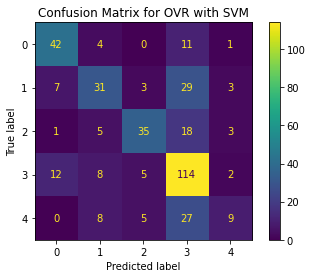

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc_ovr, x_test_flatten, y_test)
plt.title("Confusion Matrix for OVR with SVM")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


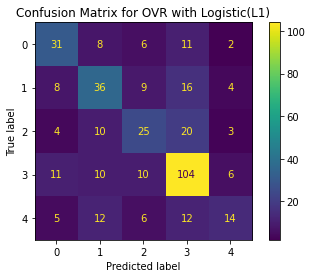

In [ ]:
plot_confusion_matrix(log_l1, x_test_flatten, y_test)
plt.title("Confusion Matrix for OVR with Logistic(L1)")
plt.show()


OVO Classifier


In [ ]:
# ovo = OneVsOneClassifier(LinearSVC(random_state=0)).fit(x_train_flatten,y_train)

In [ ]:
# y_pred_ovo = ovo.predict(x_test_flatten)
# print("OVO model analysis")
# print(classification_report(y_test, y_pred_ovo))

Plotting Learning Curve for SVM with OVR classifier

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
x_train_flatten.shape


(3447, 623)

In [ ]:
p_list=[100*a for a in range(1,27)]
# print(p_list)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(svc_ovr,x_train_flatten,y_train, train_sizes =p_list)

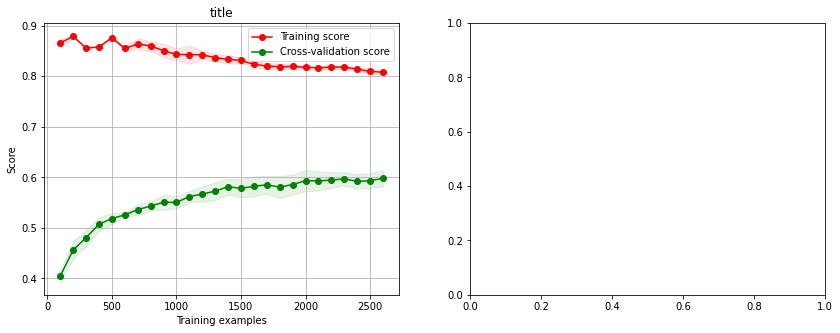

In [ ]:
# plt.plot(train_sizes, train_scores, 'r',linestyle='dashed',linewidth = 1, marker='o', markerfacecolor = 'blue', markersize = 5, label='Training loss')
# plt.plot(train_sizes, test_scores, 'g',linestyle='dashed',linewidth = 1, marker='o', markerfacecolor = 'blue', markersize = 5, label='Cross-validation loss')
# # plt.legend(loc="best")
# plt.show()
_, axes = plt.subplots(1, 2, figsize=(14, 5))
# axes = plt.plot(figsize=(7, 5))
axes[0].set_title("title")
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


axes[0].grid()
axes[0].fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes[0].fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes[0].plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axes[0].plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axes[0].legend(loc="best")


In [ ]:
svm_classifier = SVC(random_state=0, max_iter = 500)
svc_ovr_500 = OneVsRestClassifier(svm_classifier)

train_sizes, train_scores, test_scores = learning_curve(svc_ovr_500,x_train_flatten,y_train, train_sizes =p_list)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).

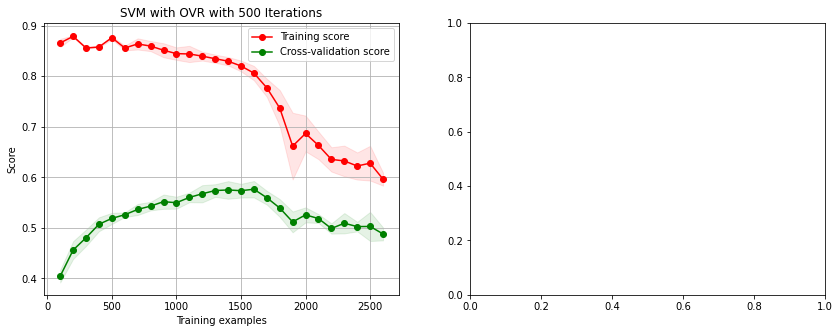

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(14, 5))
# axes = plt.plot(figsize=(7, 5))
axes[0].set_title("SVM with OVR with 500 Iterations")
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


axes[0].grid()
axes[0].fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes[0].fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes[0].plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axes[0].plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axes[0].legend(loc="best")


Logistic with L2 and 400 iterations

In [ ]:
log_l2 = LogisticRegression(C = 1,random_state=0,penalty = 'l2',max_iter=400)
train_sizes, train_scores, test_scores = learning_curve(log_l2,x_train_flatten,y_train, train_sizes =p_list)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


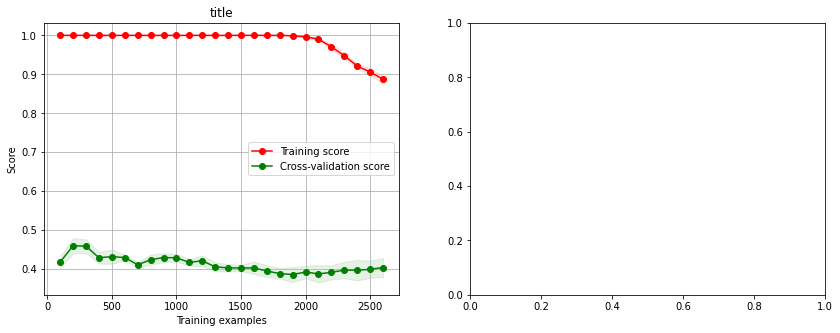

In [ ]:
# plt.plot(train_sizes, train_scores, 'r',linestyle='dashed',linewidth = 1, marker='o', markerfacecolor = 'blue', markersize = 5, label='Training loss')
# plt.plot(train_sizes, test_scores, 'g',linestyle='dashed',linewidth = 1, marker='o', markerfacecolor = 'blue', markersize = 5, label='Cross-validation loss')
# # plt.legend(loc="best")
# plt.show()
_, axes = plt.subplots(1, 2, figsize=(14, 5))
# axes = plt.plot(figsize=(7, 5))
axes[0].set_title("title")
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


axes[0].grid()
axes[0].fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes[0].fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes[0].plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axes[0].plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axes[0].legend(loc="best")


changing max iter to 1500

In [ ]:
log_l2 = LogisticRegression(C = 1,random_state=0,penalty = 'l2',max_iter=1500)
train_sizes, train_scores, test_scores = learning_curve(log_l2,x_train_flatten,y_train, train_sizes =p_list)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


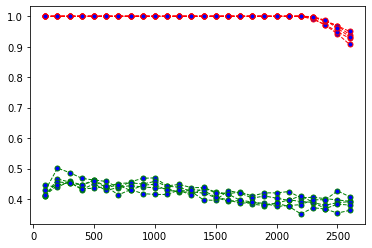

In [ ]:
plt.plot(train_sizes, train_scores, 'r',linestyle='dashed',linewidth = 1, marker='o', markerfacecolor = 'blue', markersize = 5, label='Training loss')
plt.plot(train_sizes, test_scores, 'g',linestyle='dashed',linewidth = 1, marker='o', markerfacecolor = 'blue', markersize = 5, label='Cross-validation loss')
# plt.legend(loc="best")
plt.show()

Learning curve for Logistic Regression with L2 Regularization with 1500 iterations

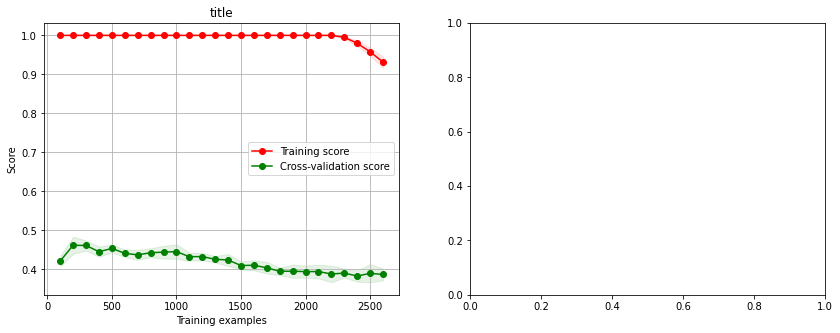

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(14, 5))
# axes = plt.plot(figsize=(7, 5))
axes[0].set_title("title")
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


axes[0].grid()
axes[0].fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes[0].fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes[0].plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axes[0].plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axes[0].legend(loc="best")


##Using Naive Classifier

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
gnb = GaussianNB()
train_sizes, train_scores, test_scores = learning_curve(gnb,x_train_flatten,y_train, train_sizes =p_list)

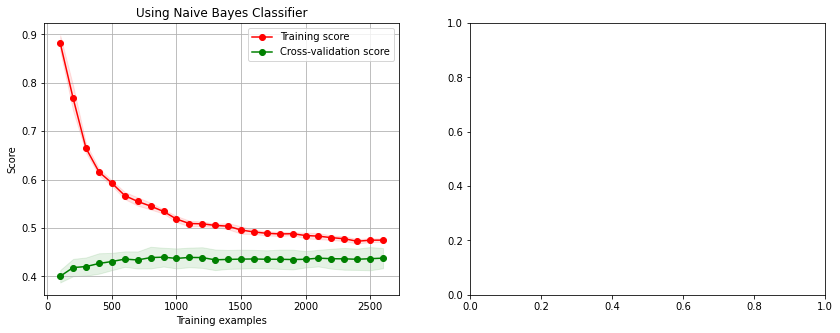

In [100]:
_, axes = plt.subplots(1, 2, figsize=(14, 5))
# axes = plt.plot(figsize=(7, 5))
axes[0].set_title("Using Naive Bayes Classifier")
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


axes[0].grid()
axes[0].fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes[0].fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes[0].plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axes[0].plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axes[0].legend(loc="best")
